<a href="https://colab.research.google.com/github/Ashwinks1995/hello/blob/master/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skills required for a high paying Data Analyst job

![Money!](http://thecircular.org/wp-content/uploads/2015/10/17123251389_1881fb0ba2_k.jpg)

##Ingestion

* Indeed data set with job listenings for data analyst, data scientist and data engineer
* Let us see what skills we need to increase the salary we get!

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

% matplotlib inline


In [0]:
data = pd.read_csv("https://raw.githubusercontent.com/Ashwinks1995/hello/master/indeed_job_dataset%5B1%5D.csv")

##EDA

In [0]:
data.head()

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,0,0,0,1,0,0,0


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5715 entries, 0 to 5714
Data columns (total 43 columns):
Unnamed: 0                          5715 non-null int64
Job_Title                           5715 non-null object
Link                                5715 non-null object
Queried_Salary                      5715 non-null object
Job_Type                            5715 non-null object
Skill                               5483 non-null object
No_of_Skills                        5715 non-null int64
Company                             5611 non-null object
No_of_Reviews                       4753 non-null float64
No_of_Stars                         4753 non-null float64
Date_Since_Posted                   5611 non-null float64
Description                         5413 non-null object
Location                            5463 non-null object
Company_Revenue                     2017 non-null object
Company_Employees                   3199 non-null object
Company_Industry                    3

In [0]:
data.isna().sum()

Unnamed: 0                             0
Job_Title                              0
Link                                   0
Queried_Salary                         0
Job_Type                               0
Skill                                232
No_of_Skills                           0
Company                              104
No_of_Reviews                        962
No_of_Stars                          962
Date_Since_Posted                    104
Description                          302
Location                             252
Company_Revenue                     3698
Company_Employees                   2516
Company_Industry                    1889
python                                 0
sql                                    0
machine learning                       0
r                                      0
hadoop                                 0
tableau                                0
sas                                    0
spark                                  0
java            

In [0]:
data = data.drop(['Company_Employees','Company_Revenue','Link'],axis=1)

In [0]:
data.head()

,Unnamed: 0,Job_Title,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Date_Since_Posted,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,1.0,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,15.0,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,1.0,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,30.0,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,30.0,...,0,0,0,0,0,0,1,0,0,0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



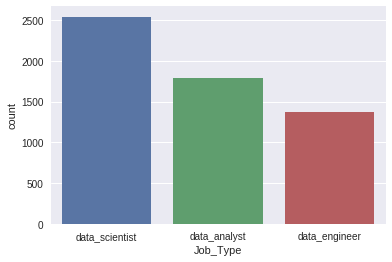

In [0]:
sns.countplot(x= data.Job_Type, data = data)

In [0]:
data.Job_Type.unique()

array(['data_scientist', 'data_analyst', 'data_engineer'], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



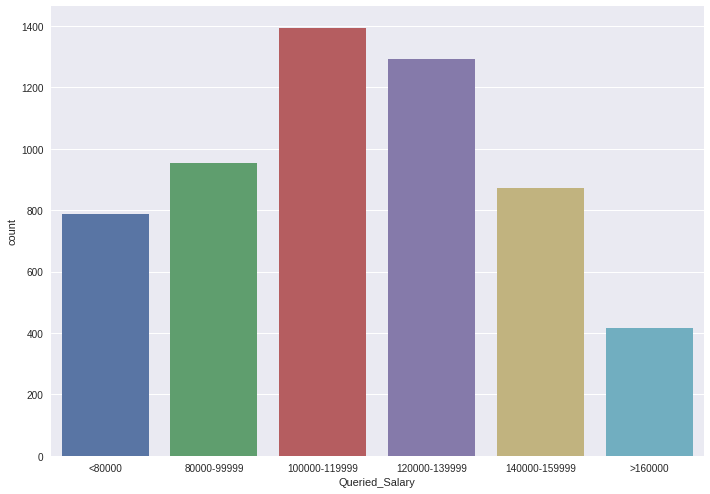

In [0]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x= data.Queried_Salary, data = data)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



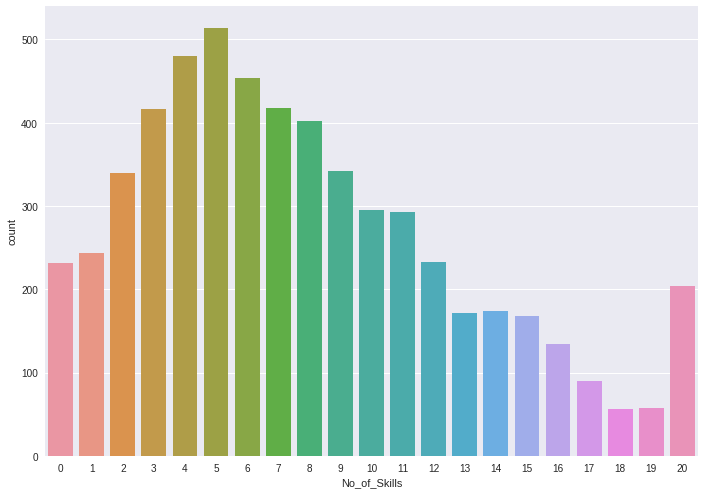

In [0]:
 sns.countplot(x= data.No_of_Skills, data = data)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



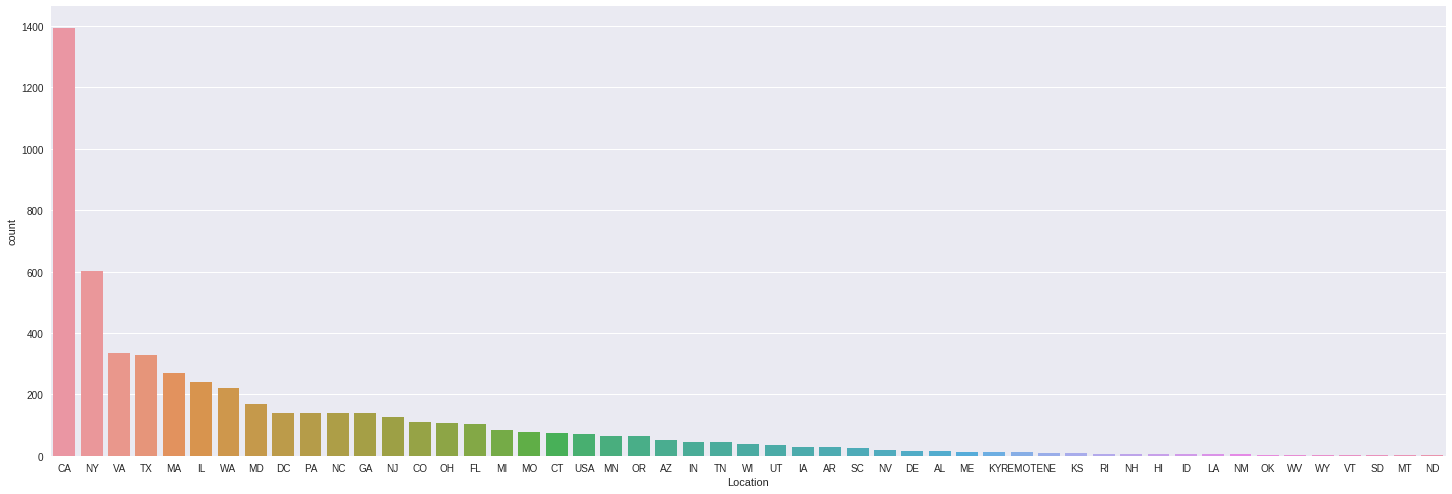

In [0]:
sns.set(rc={'figure.figsize':(25,8.27)})
sns.countplot(x= data.Location, data = data, order = data['Location'].value_counts().index)

In [0]:
data.Location.unique()

array(['MO', 'TX', 'OR', 'DC', 'MD', 'NY', 'GA', 'ID', 'PA', 'FL', 'MA',
       'VA', 'NJ', 'LA', 'CA', 'MN', 'WA', 'NC', 'IL', 'CO', 'UT', 'OH',
       'USA', 'AR', 'ME', 'NV', 'CT', 'REMOTE', 'RI', 'TN', 'WI', 'SC',
       'MI', 'KY', 'AZ', 'NE', 'IN', 'NM', 'AL', 'KS', 'IA', 'DE', nan,
       'HI', 'NH', 'OK', 'VT', 'WV', 'SD', 'WY', 'MT', 'ND'], dtype=object)

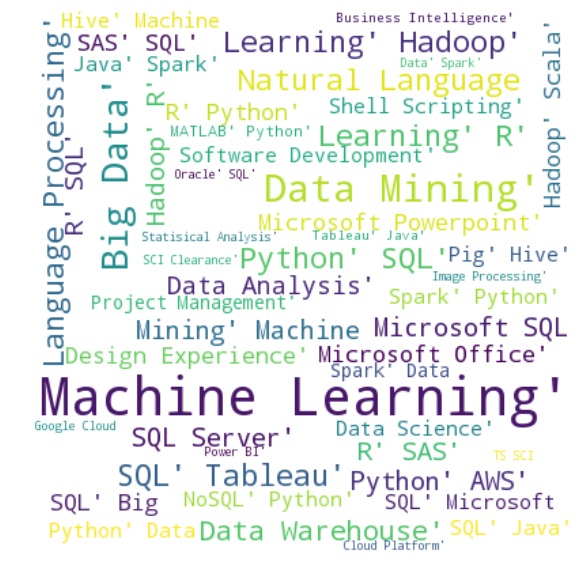

In [0]:
text2 = pd.Series.to_frame(data.Description)
wordcloud2 = WordCloud(max_font_size=50, max_words=50, background_color="white",width=400, height=400).generate(' '.join(map(str,data['Skill'])))
#wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud2, interpolation="bilinear",)
plt.axis("off")
plt.show()

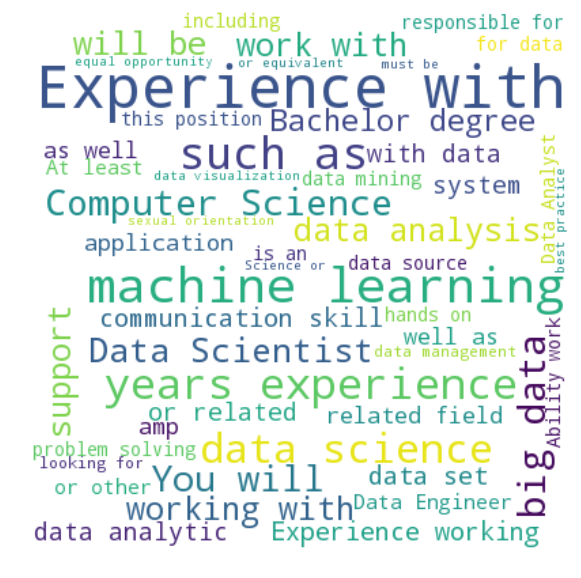

In [0]:
text2 = pd.Series.to_frame(data.Description)
wordcloud2 = WordCloud(max_font_size=50, max_words=50, background_color="white",width=400, height=400,stopwords = ['li','ul','br','div','to','of','in','and','the',"We",'are','You will']).generate(' '.join(map(str,data['Description'])))
#wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()

<Figure size 1440x720 with 0 Axes>

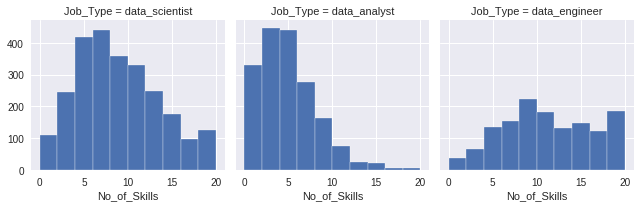

In [0]:
plt.figure(figsize=(20,10))
g = sns.FacetGrid(data, col="Job_Type")
g = g.map(plt.hist, "No_of_Skills", edgecolor="w")

/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:199: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations



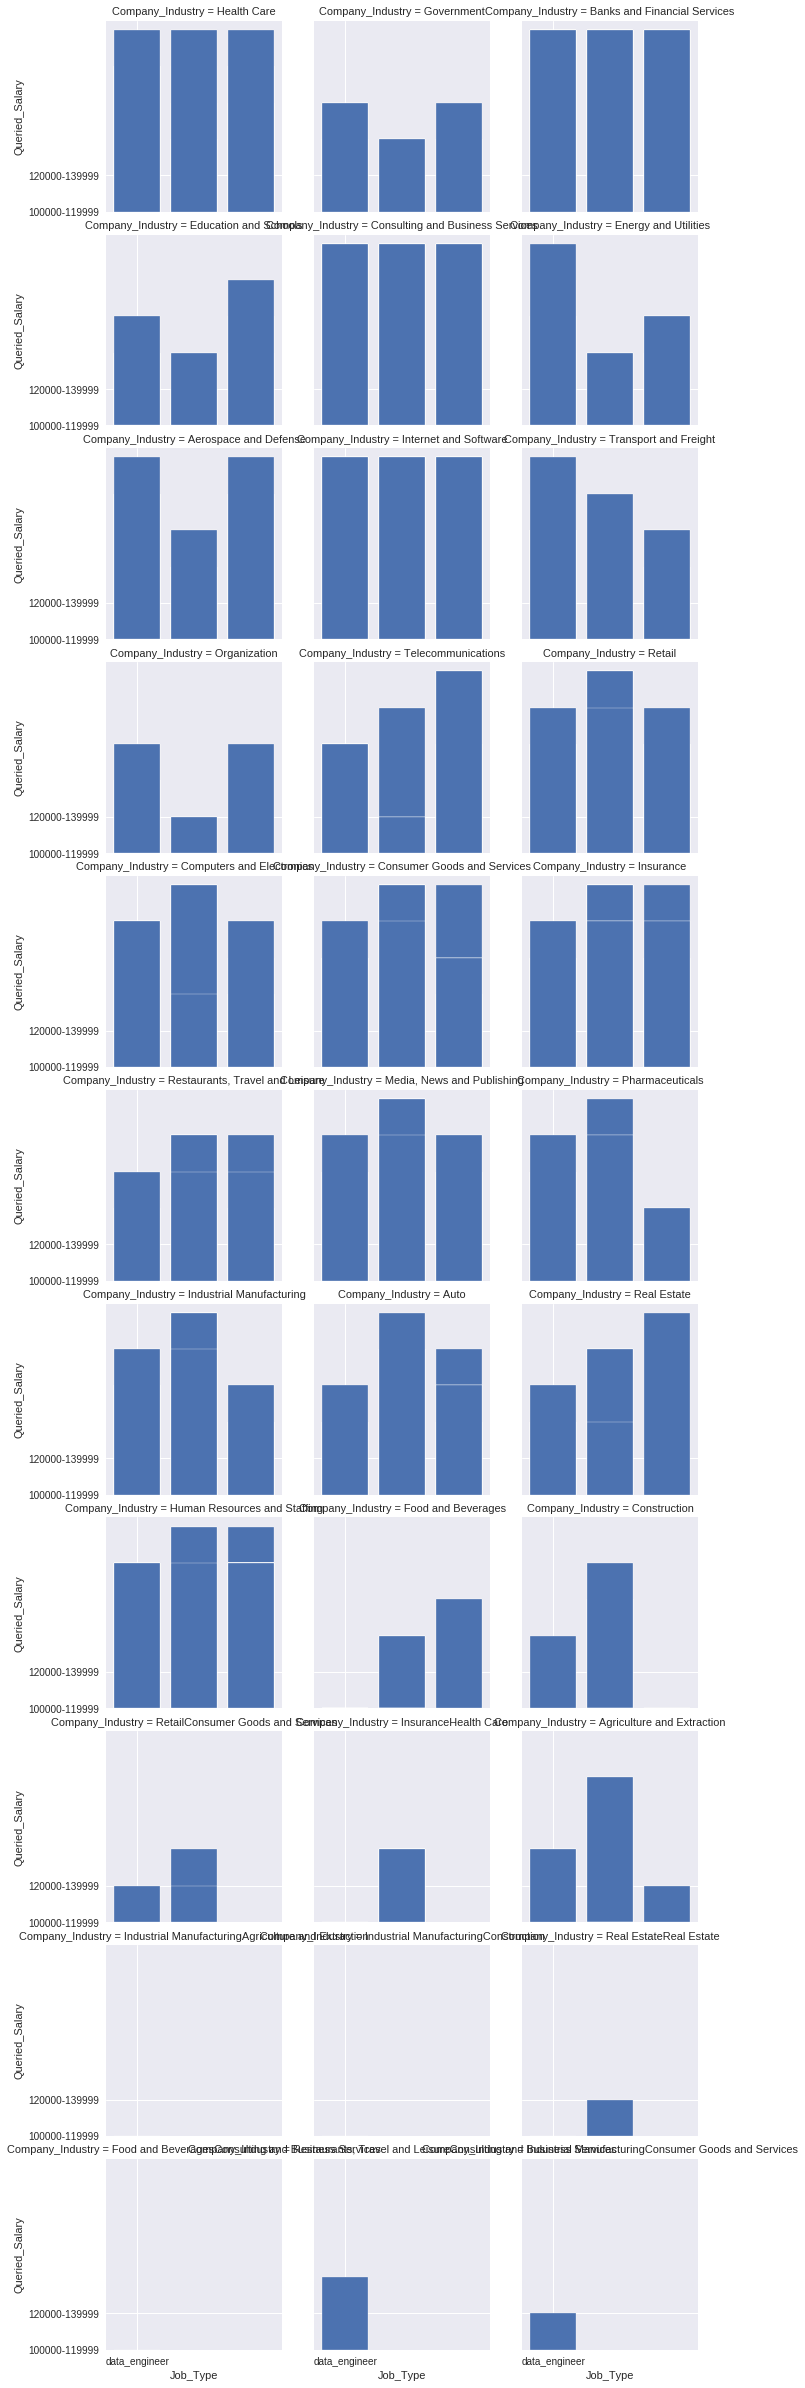

In [0]:
sns.set(rc={'figure.figsize':(25,10)})
g = sns.FacetGrid(data, col="Company_Industry",col_wrap= 3)
g = g.map(plt.bar,  "Job_Type","Queried_Salary", edgecolor="w")

In [0]:
data.drop(['Unnamed: 0','Skill','Job_Title','Company','No_of_Reviews','No_of_Stars','Date_Since_Posted','Description','Location','Company_Industry'],axis =1, inplace=True)

In [0]:
data.info()

## Modeling

In [0]:
X = data.iloc[:,2:]
y = data.iloc[:,0]

In [0]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
import sklearn.metrics  as skm

rfc = RandomForestClassifier(n_estimators= 500,random_state=0, max_features="sqrt")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=1)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
from sklearn.metrics import accuracy_score
RDacc = accuracy_score(y_test,y_pred)

RD_precision = skm.precision_score(y_test,y_pred,average = None)


In [0]:
RDacc


0.410323709536308

In [0]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
import sklearn.metrics  as skm
from sklearn.metrics import accuracy_score

def rdchecker(n):
  rfc = RandomForestClassifier(n_estimators= n,random_state=0)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=1)
  rfc.fit(X_train, y_train)
  y_pred = rfc.predict(X_test)
  RDacc = accuracy_score(y_test,y_pred)
  RD_precision = skm.precision_score(y_test,y_pred,average = None)
  return RDacc

n = list(range(100,2000,50))
output = list(map(lambda x: rdchecker(x),n))

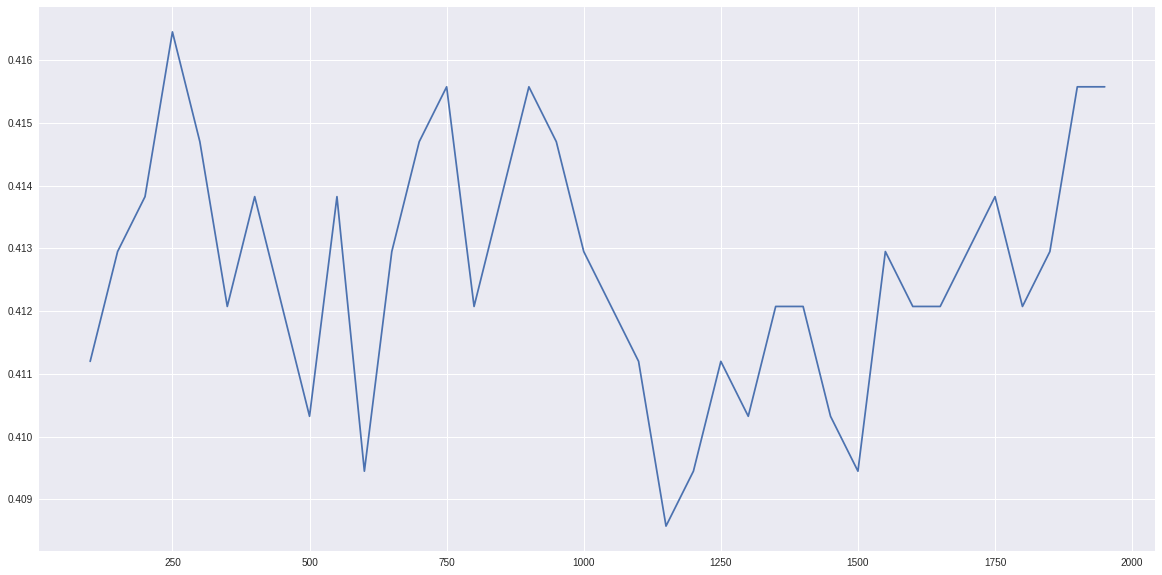

In [0]:
plt.figure(figsize=(20,10))
plt.plot(n,output)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=1)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score
Knnacc = accuracy_score(y_test,y_pred)

In [0]:
Knnacc

0.3657042869641295

In [0]:
X_test.columns.values

array(['No_of_Skills', 'python', 'sql', 'machine learning', 'r', 'hadoop',
       'tableau', 'sas', 'spark', 'java', 'Others', 'CA', 'NY', 'VA',
       'TX', 'MA', 'IL', 'WA', 'MD', 'DC', 'NC', 'Other_states',
       'Consulting and Business Services', 'Internet and Software',
       'Banks and Financial Services', 'Health Care', 'Insurance',
       'Other_industries'], dtype=object)

##Experiment

In [0]:
X_MSBA = pd.read_csv('https://raw.githubusercontent.com/Ashwinks1995/hello/master/ML_python_salaries.csv')

In [0]:
X_MSBA

,No_of_Skills,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,3,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,3,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,3,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,5,1,1,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,5,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,5,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,5,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [0]:
#rfc = RandomForestClassifier(n_estimators= n,random_state=0)
y_pred_1 = rfc.predict(X_MSBA)
y_pred_1


array(['100000-119999', '80000-99999', '80000-99999', '80000-99999',
       '80000-99999', '80000-99999', '100000-119999', '100000-119999',
       '100000-119999', '100000-119999', '100000-119999', '100000-119999'],
      dtype=object)

In [0]:
res=pd.DataFrame(data=y_pred_1)

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=1)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
from sklearn.metrics import accuracy_score
DTacc = accuracy_score(y_test,y_pred)
DTacc

0.3805774278215223

In [0]:
Final = pd.concat([X_MSBA,res], axis = 1)

In [0]:
Final.drop([' NY',' VA',' TX', ' MA',' IL',' WA',' MD',' DC',' NC',' Other_states', ' hadoop', ' sas', ' java', ' Others', ' spark'],axis=1)

In [0]:
Final

,No_of_Skills,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,...,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries,0
0,3,0,1,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,100000-119999
1,3,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,80000-99999
2,3,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,80000-99999
3,3,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,80000-99999
4,3,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,80000-99999
5,3,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,80000-99999
6,5,1,1,1,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,100000-119999
7,5,1,1,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,100000-119999
8,5,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,100000-119999
9,5,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,100000-119999


##Conclusion

* The model's accuracy is around 42% as of now
* To further predict the salary with increeased accuracy I'll perform text mining and fish out the years of work experienece and non-technical skills requirements for the job
* Python and ML are going to be key skills sets that your employers look for irrespective of inudstry. So get going guys! :D 


